# **<div align="center"> Problem Set 5 </div>**
**Question 1:** What is the country with the latest year (most recent) of independence?
* Provide your answer (2 points) and the code used to get that answer (3 points).
* The code can either be SQL or SQLAlchemy code.


In [1]:
#!/usr/bin/env python
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc

# Create a Engine object which is our handle into the database.
engine = create_engine('sqlite:////home/ellengarcia11/CompToolsEllen/world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database.
#  Since the database already exists and has tables defined, we can create Python objects based on these automatically.
DBInfo=MetaData(engine)

In [14]:
# Create a country object based on the metadata
country=Table('country', DBInfo, autoload=True)


#SELECT country code, name, and life expectancy FROM country 
#WHERE life expectancy  > 80 ORDER BY Life Expectancy DESC LIMIT 10;

query=select([country.c.Code, country.c.Name, country.c.IndepYear])\
             .where(country.c.IndepYear > 1900)\
             .order_by(desc(country.c.IndepYear))\
             .limit(1)
result = conn.execute(query)
for row in result:
    print(row)
print(f"The country with the most recent independence year in this data is {row}")

('PLW', 'Palau', 1994)
The country with the most recent independence year in this data is ('PLW', 'Palau', 1994)


**Question 2:**
Refer to this page: https://www.statista.com/chart/11430/the-worlds-youngest-countries/ According to this, there are several countries that have become independent since the country in your answer to question 1.

Pick one of those newer countries and using Wikipedia, or another source, add as much data to the country table as you can for that country.
* Do not spend a lot of time trying to find all the data. One or two additional items beyond Name and IndepYear is fine.
* Provide either a SQL INSERT statement or a SQLAlchemy insert statement to add the data for a new country into the database.

In [21]:
print(country.insert())

INSERT INTO country ("Code", "Name", "Continent", "Region", "SurfaceArea", "IndepYear", "Population", "LifeExpectancy", "GNP", "GNPOld", "LocalName", "GovernmentForm", "HeadOfState", "Capital", "Code2") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


In [22]:
my_insert=country.insert().values(Code='SRB', Name='Serbia', IndepYear=2006,Continent='Europe',HeadOfState='Aleksandar Vučić')
print(my_insert)

INSERT INTO country ("Code", "Name", "Continent", "IndepYear", "HeadOfState") VALUES (?, ?, ?, ?, ?)


In [23]:
result = conn.execute(my_insert)

In [25]:
query=select([country.c.Code, country.c.Name, country.c.IndepYear, country.c.Continent, country.c.HeadOfState]).where(country.c.Code.like('SRB%'))
result = conn.execute(query)
for row in result:
    print(row)

('SRB', 'Serbia', 2006, 'Europe', 'Aleksandar Vučić')


**Question 3:**

For the country added in question 2, find 2 cities to add to the cities table of the database and provide the SQL or SQLAlchemy insert statement to add this data.

* Again, don't sweat it if you can't find all of the data. If it's not in Wikipedia, don't spend time looking for it! A few columns worth of data is sufficient.

**Serbia cities:**
1. Name Kikinda, Country code SRB, District North Banat, Population 97522

2. Name Niš, Country code SRB, District Nišava, Population 356298

In [27]:
city=Table('city', DBInfo, autoload=True)
print(city.insert())

INSERT INTO city ("ID", "Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?, ?)


In [28]:
my_insert=city.insert().values(Name='Kikinda', CountryCode='SRB', District='North Banat', Population='59453')
print(my_insert)

INSERT INTO city ("Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?)


In [29]:
result = conn.execute(my_insert)

In [34]:
query=select([city.c.Name, city.c.CountryCode, city.c.District, city.c.Population]).where(city.c.CountryCode.like('SRB%'))
result = conn.execute(query)
for row in result:
    print(row)

('Kikinda', 'SRB', 'North Banat', 59453)


In [35]:
print(city.insert())

INSERT INTO city ("ID", "Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?, ?)


In [36]:
my_insert=city.insert().values(Name='Niš', CountryCode='SRB', District='Nišava', Population='260237')
print(my_insert)

INSERT INTO city ("Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?)


In [37]:
result = conn.execute(my_insert)

In [38]:
#Two cities from Serbia added to the city table
query=select([city.c.Name, city.c.CountryCode, city.c.District, city.c.Population]).where(city.c.CountryCode.like('SRB%'))
result = conn.execute(query)
for row in result:
    print(row)

('Kikinda', 'SRB', 'North Banat', 59453)
('Niš', 'SRB', 'Nišava', 260237)


**Question 4:**
Using the LifeExpectancy data in the country table on the y-axis, plot this data against some other value.

* Suggestions for the x-axis: GNP, Population or IndepYear could be interesting, but up to you.
* I'd suggest using SQLAlchemy, get the data and make either a dataframe or numpy arrays and then use matplotlib to plot.


In [1]:
#plotting Life expectancy V Surface area of a country
#get the data and make a pandas data frame
#plot the data 


#!/usr/bin/env python
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc

# Create a Engine object which is our handle into the database.
engine = create_engine('sqlite:////home/ellengarcia11/CompToolsEllen/world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database.
#  Since the database already exists and has tables defined, we can create Python objects based on these automatically.
DBInfo=MetaData(engine)


In [16]:
# Auto-create the city object based on the metadata read into the DBInfo.
country=Table('country', DBInfo, autoload=True)

# Mirroring this command: SELECT Id, Name, Population FROM city LIMIT 10;
query=select([country.c.LifeExpectancy, country.c.SurfaceArea])
result = conn.execute(query)
for row in result:
    print(row)
    
print (type(query))

(Decimal('78.4000000000'), Decimal('193.0000000000'))
(Decimal('45.9000000000'), Decimal('652090.0000000000'))
(Decimal('38.3000000000'), Decimal('1246700.0000000000'))
(Decimal('76.1000000000'), Decimal('96.0000000000'))
(Decimal('71.6000000000'), Decimal('28748.0000000000'))
(Decimal('83.5000000000'), Decimal('468.0000000000'))
(Decimal('74.7000000000'), Decimal('800.0000000000'))
(Decimal('74.1000000000'), Decimal('83600.0000000000'))
(Decimal('75.1000000000'), Decimal('2780400.0000000000'))
(Decimal('66.4000000000'), Decimal('29800.0000000000'))
(Decimal('75.1000000000'), Decimal('199.0000000000'))
(None, Decimal('13120000.0000000000'))
(None, Decimal('7780.0000000000'))
(Decimal('70.5000000000'), Decimal('442.0000000000'))
(Decimal('79.8000000000'), Decimal('7741220.0000000000'))
(Decimal('77.7000000000'), Decimal('83859.0000000000'))
(Decimal('62.9000000000'), Decimal('86600.0000000000'))
(Decimal('46.2000000000'), Decimal('27834.0000000000'))
(Decimal('77.8000000000'), Decimal('

In [12]:
import pandas as pd

df = pd.read_sql(query, conn)

df.head()

,LifeExpectancy,SurfaceArea
0,78.4,193.0
1,45.9,652090.0
2,38.3,1246700.0
3,76.1,96.0
4,71.6,28748.0


Text(0.5, 1.0, 'Surface Area and Life Expectancy of Countries Around the World')

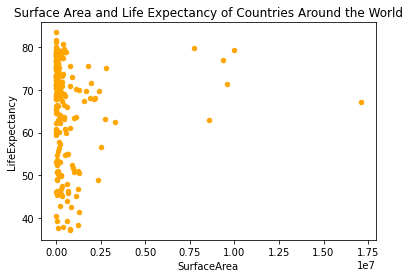

In [26]:
df.plot.scatter(x='SurfaceArea', y='LifeExpectancy', color='orange')
import matplotlib.pyplot as plt
plt.title('Surface Area and Life Expectancy of Countries Around the World')

**Grad student extra credit:** Plot LifeExpectancy vs the ratio of the total population of all the cities in the country divided by the total population of the country. This is an approximation of the % urban population in the country.